# Portfolio with the Maximum Calmar Ratio for the IT Sector 

In [1]:
from pandas_datareader import data
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Establishing Dates
start = "2017-01-01"
end = "2021-1-1"

# Establishing Assets
assets = ['INFY.NS', 'TCS.NS', 'HCLTECH.NS', 'WIPRO.NS', 'TECHM.NS', 
         'LTI.NS', 'MINDTREE.NS', 'MPHASIS.NS', 'COFORGE.NS', 'LTTS.NS']

#252 trading days in a year
N = 252

#1% risk free rate
rf =0.02

# Creating an empty dataframe
df_prices = pd.DataFrame()

# Getting the "Adj Close" data from Yahoo Finance by defining a function
# This function lists the price data as daily percent change 
def YahooData(dataframe, assets_list, start_date, end_date):
    for i in assets_list:
        dataframe[i] = data.DataReader(i, data_source = "yahoo", start=start_date, end=end_date)['Adj Close']
    return dataframe

# Running the function that we just made and saving the results to the DataFrame
df = YahooData(df_prices, assets, start, end)

# Calculating Log Return
df = np.log(df/df.shift(1))

# Dropping the first row because it's N/A
df = df.dropna()

# Viewing df head
df

INFY.NS    TCS.NS  HCLTECH.NS  WIPRO.NS  TECHM.NS    LTI.NS  \
Date                                                                       
2017-01-03 -0.007268  0.002917    0.007994 -0.009696  0.007248 -0.000294   
2017-01-04  0.003916  0.004739    0.025768  0.018248  0.018244  0.025979   
2017-01-05 -0.001605 -0.019135   -0.014457  0.010042 -0.025287 -0.009212   
2017-01-06 -0.024285 -0.022966   -0.036471 -0.021993 -0.038320 -0.016841   
2017-01-09 -0.001956  0.009728    0.028924  0.004353  0.007846  0.001029   
...              ...       ...         ...       ...       ...       ...   
2020-12-28  0.003432  0.006868    0.002662  0.001830 -0.000158  0.004170   
2020-12-29  0.008030  0.000375    0.015180  0.005469  0.019397 -0.008496   
2020-12-30 -0.002803 -0.007260    0.005116 -0.001560  0.018062  0.014083   
2020-12-31  0.007193 -0.016130    0.005777  0.004801 -0.010274 -0.000451   
2021-01-01  0.003696  0.022622    0.004587  0.004778  0.004869  0.010817   

            MINDTREE.NS  MPHASIS.NS  COFORGE.NS   LTTS.NS  
Date                                                       
2017-01-03    -0.017178   -0.036896    0.010615  0.006005  
2017-01-04     0.035777   -0.005878    0.013714 -0.002967  
2017-01-05    -0.005142    0.007366   -0.014526  0.002596  
2017-01-06    -0.045911   -0.020838   -0.018519 -0.007250  
2017-01-09    -0.009441    0.005109    0.017706  0.017324  
...                 ...         ...         ...       ...  
2020-12-28     0.006924    0.003852    0.014354  0.017034  
2020-12-29     0.008017   -0.000865   -0.003872 -0.007521  
2020-12-30     0.005044    0.019813    0.005246 -0.013780  
2020-12-31     0.018479   -0.032236    0.003908  0.000406  
2021-01-01    -0.000663   -0.006547    0.006301  0.029439  

[988 rows x 10 columns]

In [3]:
# Creating 10000 random simulations of each portfolio weight configuration
num_runs = 10000 # number of rows/iterations

# Creating a Matrix with 10000 rows, with each row representing a random portfolio:
    #first 3 columns are Mean Returns, Standard Deviation, and Sortino Ratio
    # remaining columns are each assets random weight within that random portfolio
result = np.zeros((num_runs,(len(assets)+3)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
df = df.copy()

for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(assets))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    ### daily return of the portfolio based on a given set of weights
    df['portfolio_ret'] = df.iloc[:,0]*weights[0]+df.iloc[:,1]*weights[1]+df.iloc[:,2]*weights[2]
  
                       
    # Calculating mean
    E = df['portfolio_ret'].mean()
    
    
    # Annualizing mean
    E = E*252
    

    
    # Calculating Drawdown
    def max_drawdown(return_series):
        comp_ret = (return_series+1).cumprod()
        peak = comp_ret.expanding(min_periods=1).max()
        dd = 1 - (comp_ret/peak)
        return dd.max()

    max_drawdown = max_drawdown(df['portfolio_ret'])
   
    #Calculating Annualised Calmar
    Calmar = E / max_drawdown
    
                   
    # Populating the 'result' array with the required values: Mean, Drawdown, Calmar followed by the weights                   
    result[i,0] = E
    result[i,1] = max_drawdown
    result[i,2] = Calmar
    
    for j in range(len(assets)):
        result[i,j+3]= weights[j]

In [5]:
# Converting 'result' into a DataFrame

columns = ['Mean','Drawdown', 'Calmar'] + assets

result = pd.DataFrame(result,columns=columns)
result

Mean  Drawdown    Calmar   INFY.NS    TCS.NS  HCLTECH.NS  WIPRO.NS  \
0     0.065162  0.087591  0.743938  0.126417  0.102214    0.025793  0.031673   
1     0.068762  0.103011  0.667519  0.187034  0.020492    0.062669  0.107453   
2     0.115905  0.142600  0.812795  0.162775  0.267127    0.022730  0.135329   
3     0.120747  0.166254  0.726282  0.194701  0.130857    0.160709  0.058161   
4     0.088781  0.119073  0.745602  0.160257  0.133144    0.056212  0.052807   
...        ...       ...       ...       ...       ...         ...       ...   
9995  0.086551  0.113530  0.762364  0.098042  0.161038    0.088197  0.102915   
9996  0.054976  0.086564  0.635099  0.099370  0.007109    0.119837  0.109617   
9997  0.084141  0.117888  0.713737  0.090604  0.106486    0.147915  0.021742   
9998  0.060267  0.076692  0.785839  0.025203  0.161253    0.056734  0.181163   
9999  0.077525  0.112272  0.690511  0.062676  0.089133    0.171005  0.221012   

      TECHM.NS    LTI.NS  MINDTREE.NS  MPHASIS.NS  COFORGE.NS   LTTS.NS  
0     0.096407  0.205481     0.177204    0.051773    0.154645  0.028393  
1     0.063639  0.226703     0.045566    0.091715    0.019403  0.175326  
2     0.013289  0.016707     0.139211    0.135652    0.025194  0.081986  
3     0.092202  0.077785     0.037919    0.107668    0.118982  0.021018  
4     0.284319  0.003080     0.146877    0.027672    0.006660  0.128972  
...        ...       ...          ...         ...         ...       ...  
9995  0.041553  0.141203     0.150956    0.007605    0.141305  0.067187  
9996  0.014959  0.117787     0.111548    0.175745    0.175713  0.068316  
9997  0.144029  0.033759     0.037835    0.216377    0.011921  0.189332  
9998  0.160006  0.038764     0.042384    0.090922    0.085830  0.157743  
9999  0.125785  0.080245     0.120770    0.020830    0.045383  0.063162  

[10000 rows x 13 columns]

In [6]:
Max_Calmar = result.iloc[result['Calmar'].idxmax()]
Max_Calmar

Mean           0.084361
Drawdown       0.099603
Calmar         0.846968
INFY.NS        0.043268
TCS.NS         0.275034
HCLTECH.NS     0.014217
WIPRO.NS       0.042806
TECHM.NS       0.011778
LTI.NS         0.170929
MINDTREE.NS    0.166889
MPHASIS.NS     0.009851
COFORGE.NS     0.119090
LTTS.NS        0.146138
Name: 8397, dtype: float64

In [7]:
Min_Drawdown = result.iloc[result['Drawdown'].idxmin()]
Min_Drawdown

Mean           0.005148
Drawdown       0.006474
Calmar         0.795252
INFY.NS        0.005277
TCS.NS         0.014198
HCLTECH.NS     0.000678
WIPRO.NS       0.018344
TECHM.NS       0.098429
LTI.NS         0.260084
MINDTREE.NS    0.132825
MPHASIS.NS     0.201048
COFORGE.NS     0.244483
LTTS.NS        0.024634
Name: 4977, dtype: float64

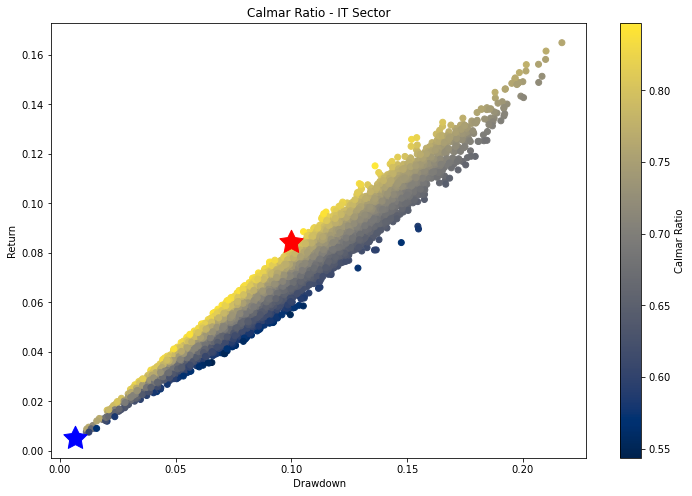

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(x=result['Drawdown'],y=result['Mean'],c=result['Calmar'],cmap='cividis')
plt.colorbar(label='Calmar Ratio')
plt.xlabel(' Drawdown')
plt.ylabel('Return')

plt.title('Calmar Ratio - IT Sector')
#Plot a red star to highlight position of the portfolio with highest Sortino Ratio
plt.scatter(Max_Calmar[1],Max_Calmar[0],marker=(5,1,0),color='r',s=600)

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(Min_Drawdown[1],Min_Drawdown[0],marker=(5,1,0),color='b',s=600)
plt.show()